<a href="https://colab.research.google.com/github/Heta-spv/Hackfestnew21/blob/main/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#data pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [89]:
df = pd.read_csv("loan_data_set.csv")

In [90]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


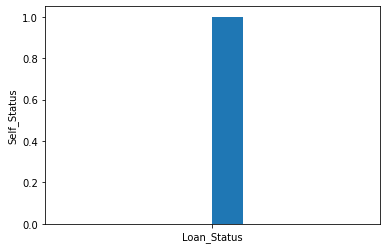

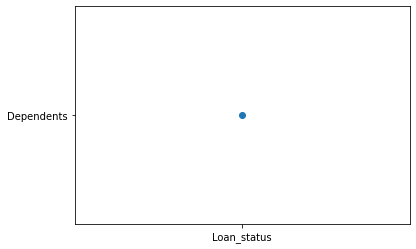

In [91]:
#use astype for type conversion
#EDA
plt.hist("Loan_Status")
#plt.xlabel("Loan_Status")
plt.ylabel("Self_Status")
plt.show()

plt.scatter('Loan_status','Dependents')
#plt.xlabel('Dependents')
#plt.ylabel('Dependents')
plt.show()


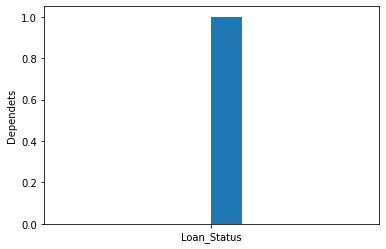

In [92]:
plt.hist("Loan_Status")
#plt.xlabel("Loan_Status")
plt.ylabel("Dependets")
plt.show()

In [93]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
df.isnull()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [157]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             374 non-null    float64
 2   Married            380 non-null    float64
 3   Dependents         372 non-null    object 
 4   Education          381 non-null    int64  
 5   Self_Employed      359 non-null    float64
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         364 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     347 non-null    float64
 11  Property_Area      381 non-null    int64  
 12  Loan_Status        381 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 41.7+ KB


In [96]:
df.isna().any().sum()

7

In [97]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [98]:
df1 = df.dropna()
print(df1)
df1 = df.dropna(axis=1)
print(df1)
df1

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP001002,Graduate,5849,0.0,Urban,Y
1,LP001003,Graduate,4583,1508.0,Rural,N
2,LP001005,Graduate,3000,0.0,Urban,Y
3,LP001006,Not Graduate,2583,2358.0,Urban,Y
4,LP001008,Graduate,6000,0.0,Urban,Y
...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,Rural,Y
610,LP002979,Graduate,4106,0.0,Rural,Y
611,LP002983,Graduate,8072,240.0,Urban,Y
612,LP002984,Graduate,7583,0.0,Urban,Y


In [99]:
df1 = df.dropna(thresh=2)
print(df1)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [100]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
#df['Loan_ID'] = df['Loan_Status'=='y'].astype('int')
df = df[df['Property_Area'] != 'Semiurban']

In [101]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df['Married'] = df['Married'].map({'Yes':1,'No':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
df['Property_Area'] = df['Property_Area'].map({'Urban':1,'Rural':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [109]:
#Independant features and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [110]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,1.0,1.0,0,1,0.0,3232,1950.0,108.0,360.0,1.0,0
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1


In [111]:
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
611    1
612    1
Name: Loan_Status, Length: 381, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_train = train_test_split(X, y, test_size=0.30,random_state=42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
#LogisticRegression.fit(X_train,y_train)
#LogisticRegression.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['11','12','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40], 'max_iter':[100,200,300]}

In [147]:
#classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)
classifier_regressor = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [154]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,classifier_regressor,cv=10)
logreg.fit(X_train,y_train)
#X_train = X_train.reshape(X_train.shape[1:])

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)